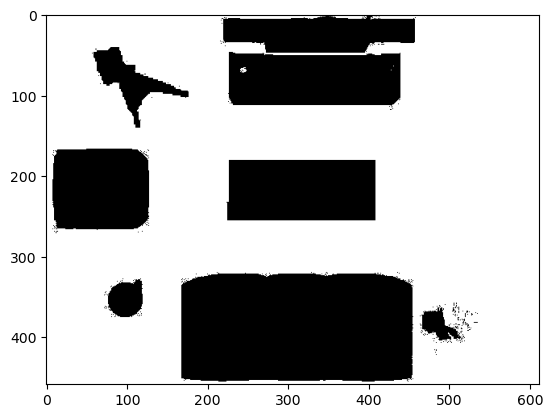

In [7]:
import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("furn2-.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to binary with a threshold of 1
_, binary_image = cv2.threshold(gray_image, 252, 255, cv2.THRESH_BINARY)

cv2.imwrite('binary_image.jpg', binary_image)
#Show the image with matplotlib
plt.imshow(binary_image, cmap="gray")
plt.show()



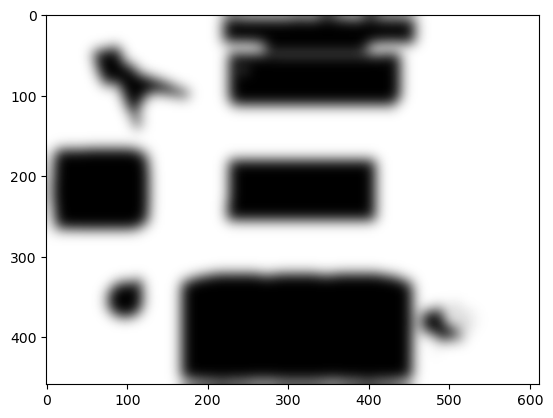

In [8]:
import cv2
import numpy as np
r = 20  # Example radius
sigma = r *1.2/ 3  # Example relation, adjust based on your needs

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(binary_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
plt.imshow(blurred_image, cmap="gray")
plt.show()


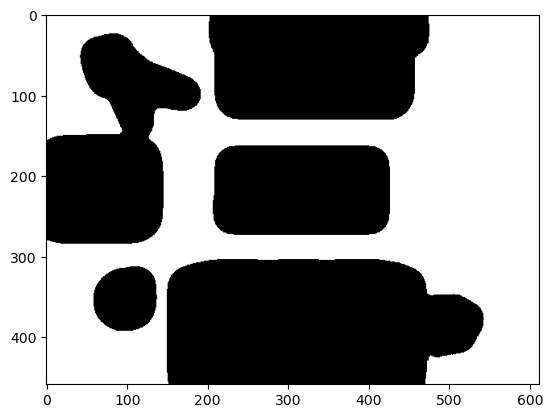

True

In [9]:
# Convert the grayscale image to binary with a threshold of 1
_, Final_image = cv2.threshold(blurred_image, 252, 255, cv2.THRESH_BINARY)
# cv2.imwrite(Final_image)
#Show the image with matplotlib
plt.imshow(Final_image, cmap="gray")
plt.show()
cv2.imwrite('Margin_Image_furn2.png', Final_image)


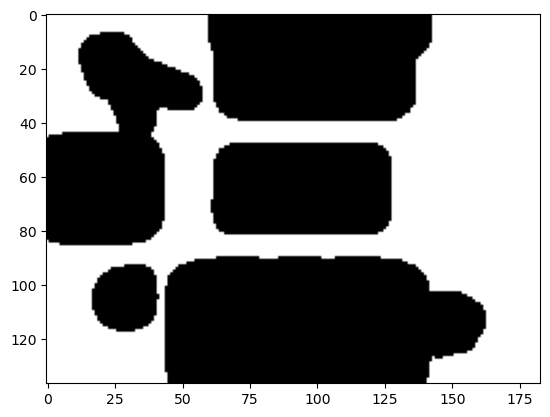

In [10]:
# Resize the image
# Define the scale factor. For example, 0.25 will reduce the size by half.
scale_factor = 0.3

# Calculate the new dimensions
width = int(Final_image.shape[1] * scale_factor)
height = int(Final_image.shape[0] * scale_factor)
new_dimensions = (width, height)

# Resize the image
resized_image = cv2.resize(Final_image, new_dimensions, interpolation=cv2.INTER_AREA)
_, resized_image = cv2.threshold(resized_image, 252, 255, cv2.THRESH_BINARY)

# Save the resized image
cv2.imwrite('map/resized_image.png', resized_image)
plt.imshow(resized_image, cmap="gray")
plt.show()

In [13]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Initialize global variables
start_point = None
end_point = None
start_point_record = []
end_point_record = []
drawing = False  # True if mouse is pressed
agent_num = 2
agent_current = 1
count = 0
agent_points = (agent_num,2)
# agent_position = zeros(agent_points)

# Define the mouse callback function
def select_points(event, x, y, flags, param):
    global start_point, end_point, drawing, count, agent_num, agent_current
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if count%2 == 0:
            start_point = (x , y)
            start_point_record.append(start_point)
            print("The Start Point of agent " + str(agent_current) + " is: ")
            print(start_point)
            cv2.circle(img2, start_point, radius=3, color=(0, 0, 255), thickness=-1)
        elif count%2 == 1:
            end_point = (x, y)
            end_point_record.append(end_point)
            print("The End Point of agent " + str(agent_current) + " is: ")
            print(end_point)
            cv2.circle(img2, end_point, radius=3, color=(0, 255, 0), thickness=-1)
            agent_current+=1
        
#         print(count)
        cv2.imshow('image', img2)
        
        count+=1
        
        




In [ ]:
# Load an image
print("Please select start and end points for agents.")
img2 = cv2.imread('map/resized_image.png')

cv2.namedWindow('image')
cv2.setMouseCallback('image', select_points)

# Display the image
cv2.imshow('image', img2)



k = cv2.waitKey(0) & 0xff
if k == 27:
    print(k)
    cv2.destroyAllWindows()

In [16]:
# Importing the required libraries
import sys
import argparse
import numpy as np
import math
from utils import move
import random
import matplotlib.pyplot as plt
from QuadMDP.QuadTree import Point, Rect
from QuadMDP.QuadMDP import QuadMDP
from utils.Obstacle import Obstacle, Agent
from utils.Global import Global
from utils.agent_graph import *
from matplotlib.animation import FuncAnimation
import time
import csv
from matplotlib.patches import Circle

Map Width: 137
Map height: 183


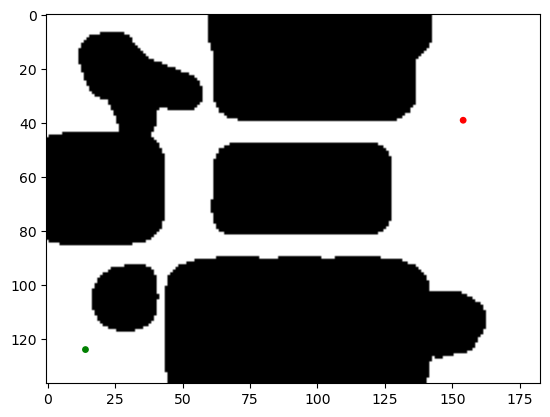

In [17]:
# Initializing the world from the picture
filename = 'resized_image.png'
image = plt.imread('map/' + filename)
mapWidth, mapHeight = image.shape
print("Map Width:", mapWidth)
print("Map height:", mapHeight)
mapDepth = (int)(math.log(mapWidth,2))
searchDepth = 2 # Search depth within QuadMDP

fig,ax = plt.subplots(1)

# Global class for the whole environment
g = Global((mapWidth,mapHeight))
ax.imshow(image, cmap="gray")

# startPos = start_point_record[0]
startPos = (154, 39)
# goalPos = end_point_record[0]
goalPos = (14, 124)
x_start,y_start = startPos
circ_start = Circle((x_start,y_start),1, color='r')
ax.add_patch(circ_start)
x_end,y_end = goalPos
circ_end = Circle((x_end,y_end),1, color='g')
ax.add_patch(circ_end)

# plt.show()




In [18]:
import sys
import argparse
import numpy as np
import math
from utils import move
import random
import matplotlib.pyplot as plt
from QuadMDP.QuadTree import Point, Rect
from QuadMDP.QuadMDP import QuadMDP
from utils.Obstacle import Obstacle, Agent
from utils.Global import Global
from utils.agent_graph import *
from matplotlib.animation import FuncAnimation
import time
import csv
from matplotlib.patches import Circle

Map Width: 137
Map height: 183


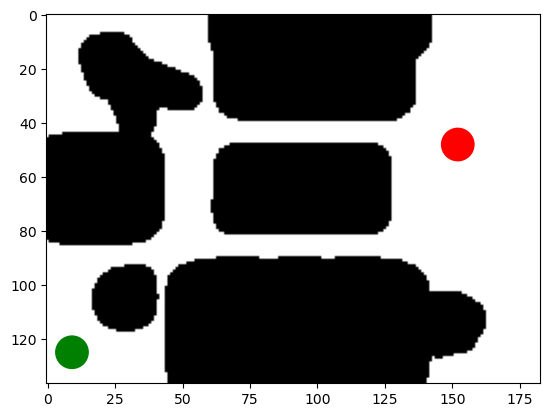

In [19]:
# Initializing the world from the picture
filename = 'resized_image.png'
image = plt.imread('map/' + filename)
mapWidth, mapHeight = image.shape
print("Map Width:", mapWidth)
print("Map height:", mapHeight)
mapDepth = (int)(math.log(mapWidth,2))
searchDepth = 2 # Search depth within QuadMDP

scale_factor = 0.3
startPos = (48,152)
goalPos = (125,9)
fig,ax = plt.subplots(1)

# Global class for the whole environment
g = Global((mapWidth,mapHeight))
ax.imshow(image, cmap="gray")

y_start,x_start = startPos
circ_start = Circle((x_start,y_start),scale_factor*r, color='r')
ax.add_patch(circ_start)
y_end,x_end = goalPos
circ_end = Circle((x_end,y_end),scale_factor*r, color='g')
ax.add_patch(circ_end)



In [20]:

# QuadMDP class for generating the quad decomposed states
quad = QuadMDP(Rect(mapWidth/2-0.5,mapHeight/2-0.5,mapWidth,mapHeight),mapDepth)



# Initialize time collection
times = [0] #first entry is time steps, second+third are realtime global path search

# Load all obstacles
for x in range(mapWidth):
    for y in range(mapHeight):
        if image[x,y] == 0:
            g.createObstacle(move.NONE,(x,y))
            quad.insert(Point(x,y,True))

# Generate quad decomposed states
S = quad.findEmptySpace(searchDepth)
graph = quad.generateGraph(S, searchDepth)

# Generate the start position and the goal

startQuadMDP = quad.findContainedQuadMDP(startPos)
goalQuadMDP = quad.findContainedQuadMDP(goalPos)

DFS = False  # set to True to use DFS instead of BFS
Simple = True

# Get the optimal path in the Quadtree representation

if DFS:  # DFS
    path_dfs = quad.getPathDFSV2(S,searchDepth,startQuadMDP,goalQuadMDP, path = [], visited = set())
    path = [element.getTuple() for element in path_dfs]
else:  # BFS
    times.append(time.perf_counter())
    path = quad.getOptimalPath(S,searchDepth,startQuadMDP.getTuple(),goalQuadMDP.getTuple())
    times.append(time.perf_counter())
path.append(goalPos)


# Projecting the path to the Global representation
for i, p in enumerate(path):
    decision = np.random.randint(0, 3)
    if decision == 0:
        path[i] = (math.floor(p[0]), math.floor(p[1]))
    if decision == 1:
        path[i] = (math.ceil(p[0]), math.floor(p[1]))
    if decision == 2:
        path[i] = (math.floor(p[0]), math.ceil(p[1]))
    if decision == 3:
        path[i] = (math.ceil(p[0]), math.ceil(p[1]))

print("Path we want to take: ", path)

Path we want to take:  [(51, 159), (77, 148), (83, 133), (82, 129), (87, 129), (88, 122), (87, 116), (88, 111), (87, 106), (88, 99), (87, 93), (88, 88), (88, 82), (88, 76), (87, 71), (87, 65), (87, 60), (87, 53), (87, 48), (88, 42), (87, 37), (87, 30), (87, 26), (90, 16), (90, 5), (97, 6), (107, 5), (115, 6), (127, 10), (125, 9)]


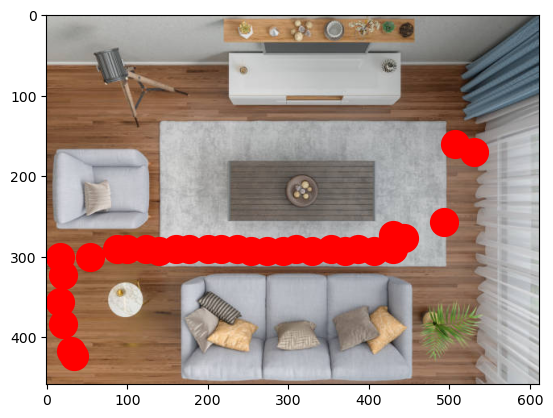

In [22]:
fig,ax = plt.subplots(1)
filename = 'furn2.jpg'
image_ori = plt.imread('map/' + filename)
ax.imshow(image_ori)

plt.scatter(startPos[1]/scale_factor,startPos[0]/scale_factor, marker="o", color="red", s=r**2)
for point in path:
    plt.scatter(point[1]/scale_factor,point[0]/scale_factor, marker="o", color="red", s=r**2)


plt.show()

In [13]:
# Importing the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [14]:
class MazeGenerator:
    def __init__(self, width, height, density, num_obstacles, random_seed=None):
        self.width = width
        self.height = height
        self.density = density
        self.num_obstacles = num_obstacles
        self.random_seed = random_seed
        self.grid = self.generate_random_maze()
        self.obstacles = self.init_obstacles()

    def generate_random_maze(self):

        if self.random_seed is not None:
            random.seed(self.random_seed)  # Set random seed for Python's random module

        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit     
        
        return maze


    def init_obstacles(self):

        obstacles = []
        for _ in range(self.num_obstacles):
            obstacle = self.generate_obstacle_position()
            obstacles.append(obstacle)
        return obstacles

    def generate_obstacle_position(self):
        while True:
            obstacle = [random.randint(0, self.height - 1), random.randint(0, self.width - 1)]
            if self.grid[obstacle[0], obstacle[1]] == 0:  # Check if the position is empty
                return obstacle

def update_obstacles(self):
    if self.random_seed is not None:
        random.seed(self.random_seed)  # Set random seed for Python's random module

    # Convert obstacles list to a set of tuples for faster lookup
    obstacle_set = set(tuple(obstacle) for obstacle in self.obstacles)

    # Iterate through each obstacle
    for obstacle in self.obstacles:
        # Store the original position
        original_position = tuple(obstacle)

        # Try random movements until a valid one is found
        while True:
            # Generate a random direction (up, down, left, right)
            direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
            
            # Calculate new position based on the direction
            new_position = (obstacle[0] + direction[0], obstacle[1] + direction[1])
            
            # Check if the new position is within the maze boundaries and not a wall
            if (0 <= new_position[0] < self.height and
                0 <= new_position[1] < self.width and
                self.grid[new_position[0], new_position[1]] != 1):
                
                # Check if the new position collides with another obstacle
                if new_position not in obstacle_set:
                    # Update the obstacle position
                    obstacle[:] = new_position
                    # Update the set of obstacle positions
                    obstacle_set.remove(original_position)
                    obstacle_set.add(new_position)
                    break



    def display(self, start_positions, goal_positions, paths=None, animate=False, tres = 1):
        fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figsize as needed
        ax.imshow(self.grid, cmap='binary')
        self.obstacles = self.init_obstacles()

        if isinstance(start_positions, list):
            # Mark the entrance and exit positions for each pair
            for i in range(len(start_positions)):
                ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    self.update_obstacles()
                    for obstacle in self.obstacles:
                        ax.scatter(obstacle[1], obstacle[0], color='red', marker='s', s=50, label='Obstacle')                    
                    for i in range(len(start_positions)):
                        ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                        ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')
                        path_x, path_y = zip(*paths[i][:frame+1])
                        ax.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
                        ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=tres)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths[0]), interval=10)
                plt.show()
                return ani
        else:
            # Mark the entrance and exit positions
            ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
            ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                print('========test===========')
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    self.update_obstacles()
                    for obstacle in self.obstacles:
                        ax.scatter(obstacle[1], obstacle[0], color='red', marker='s', s=50, label='Obstacle')
                    ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
                    ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')
                    path_x, path_y = zip(*paths[:frame+1])
                    ax.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
                    ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=tres)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths), interval=10)
                plt.show()
                return ani
        plt.legend()
        plt.show()




In [15]:
# Create a maze generator instance
# Define the dimensions of the maze
# width = 32
# height = 32

# Define the density of walls in the maze (between 0 and 1)
# density = 0.25
# maze_generator = MazeGenerator(width, height, density, 0)


# Specify the starting and goal positions
startPos = (48,152)
goalPos = (125,9)

# Display the generated maze as a figure with starting and goal positions
# maze_generator.display(startPos, goalPos)

In [16]:
class ValueIterationMazeSolver_V1:
    def __init__(self, maze, startPos, goalPos, gamma=1, epsilon=1e-4):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Convergence threshold
        self.height, self.width = maze.shape  # Get maze dimensions
        self.V = np.zeros((self.height, self.width))-00  # Value function initialized to zeros
        self.max_it = 100

    def value_iteration(self):
        num_it = 0
        while True:
            delta = 0
            for i in range(self.height):
                for j in range(self.width):
                    if self.maze[i, j] == 1:  # Skip if it's a wall
                        self.V[i, j] = -np.inf
                        continue
                    v = self.V[i, j]
                    self.V[i, j] = self.compute_max_value(i, j)
                    delta = max(delta, abs(v - self.V[i, j]))
            if delta < self.epsilon:
                break
            num_it = num_it + 1
            if num_it > self.max_it:
                print('precesion = {}'.format(delta))
                break

    def greedy_policy(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        
        max_value = -np.inf
        next_v = np.zeros((4,1))
        # greedy_policy
        ac_idx = 0
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        for action in actions:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                next_v[ac_idx] = value
                max_value = max(max_value, value)
            else:
                next_v[ac_idx] = -np.inf
            ac_idx = ac_idx + 1

        greedy_actions = [i for i, tmp_v in enumerate(next_v) if tmp_v == max_value]
                  
        return actions[np.random.choice(greedy_actions)]

    def compute_max_value(self, i, j):
        if (i, j) == self.goalPos:
            return 0  # Value of the goal state is 0
        max_value = -np.inf
        for action in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Possible actions: up, down, left, right
            i_, j_ = i + action[0], j + action[1]
            if 0 <= i_ < self.height and 0 <= j_ < self.width and self.maze[i_, j_] != 1:
                value = self.V[i_, j_]
                max_value = max(max_value, value)
        return -1 + self.gamma * max_value  # Reward: -1 for every movement

    def get_optimal_path(self):
        path = [self.startPos]
        i, j = self.startPos
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        while (i, j) != self.goalPos:
            max_value = -np.inf
            next_pos = None
            action = self.greedy_policy(i,j)
            i_, j_ = i + action[0], j + action[1]
            next_pos = (i_, j_)
            path.append(next_pos)
            i, j = next_pos
        return path
    

    def plot_value_function(self):
        plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
        plt.imshow(self.V, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title('Learned Value Function')
        plt.show()





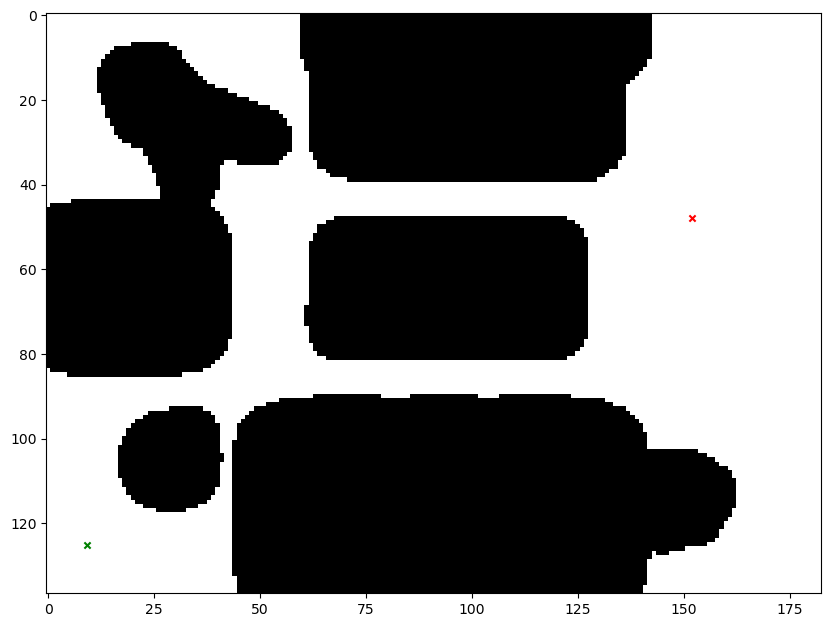

In [17]:
from PIL import Image
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize as needed
img_resized = plt.imread('map/resized_image.png')
plt.scatter(startPos[1],startPos[0], marker="x", color="red", s=20)
plt.scatter(goalPos[1],goalPos[0], marker="x", color="green", s=20)


ax.imshow(img_resized, cmap="gray")

In [18]:
# Example usage:
from skimage import util 

inverted_img = util.invert(img_resized)
# ax.imshow(inverted_img, cmap="grid")

solver = ValueIterationMazeSolver_V1(inverted_img, startPos, goalPos)


precesion = 2.0


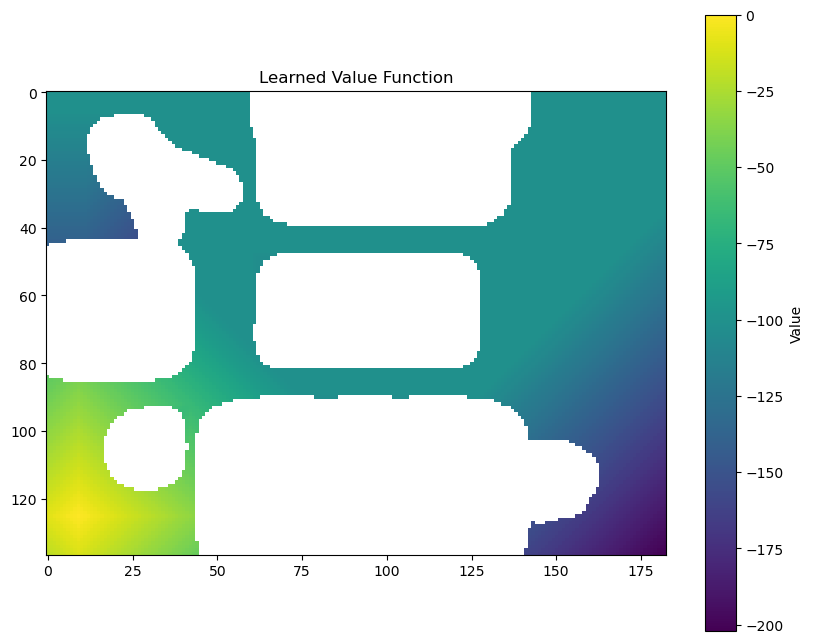

In [19]:
solver.value_iteration()
solver.plot_value_function()

In [20]:
optimal_path = solver.get_optimal_path()
print("Optimal Path:", optimal_path)

Optimal Path: [(48, 152), (48, 153), (47, 153), (46, 153), (47, 153), (46, 153), (46, 152), (45, 152), (44, 152), (43, 152), (42, 152), (41, 152), (41, 151), (40, 151), (40, 150), (40, 151), (39, 151), (38, 151), (38, 152), (39, 152), (39, 151), (38, 151), (38, 150), (37, 150), (36, 150), (36, 149), (37, 149), (36, 149), (35, 149), (35, 150), (36, 150), (36, 149), (36, 150), (37, 150), (37, 149), (38, 149), (39, 149), (40, 149), (39, 149), (40, 149), (40, 150), (40, 151), (39, 151), (40, 151), (41, 151), (41, 152), (41, 151), (41, 152), (40, 152), (40, 151), (40, 150), (40, 151), (41, 151), (41, 152), (41, 151), (41, 150), (41, 151), (40, 151), (41, 151), (41, 152), (42, 152), (41, 152), (40, 152), (39, 152), (40, 152), (40, 153), (39, 153), (39, 152), (39, 153), (39, 152), (39, 151), (39, 152), (38, 152), (38, 153), (39, 153), (39, 154), (39, 155), (40, 155), (39, 155), (39, 156), (40, 156), (40, 155), (41, 155), (42, 155), (42, 154), (42, 155), (41, 155), (41, 154), (42, 154), (43, 1

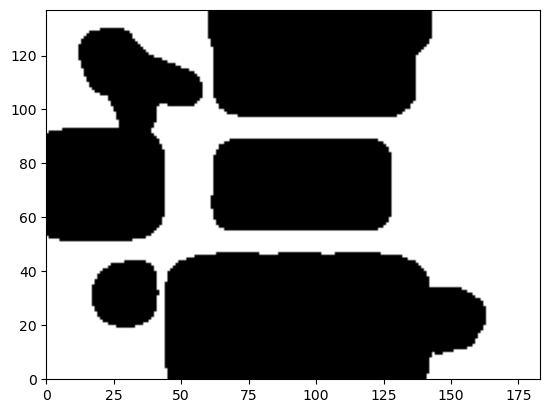

/var/folders/6f/l09x402130x3f_hlf6jdnmrc0000gn/T/ipykernel_10479/1127972363.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(points[frame, 0], points[frame, 1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image


# Points through which the point will move (example points, adjust accordingly)
points = np.array(optimal_path)
# Setting up the plot
fig, ax = plt.subplots()
mapWidth, mapHeight = img_resized.shape
# Display the image
ax.imshow(img_resized, extent=[0, mapHeight, 0, mapWidth], cmap="gray")
# Plot initial point
point, = ax.plot([], [], 'ro')  # Red point

def init():
    point.set_data([], [])
    return point,

def update(frame):
    # Update the position of the red point based on the current frame
    point.set_data(points[frame, 0], points[frame, 1])
    return point,

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(points), init_func=init, blit=True)

plt.show()
ani.save('moving_point_on_image.gif', writer='pillow', fps=2)
